In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

# This describe the processed dataset as below
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [3]:
x = digits.data
y = digits.target


In [4]:
# Creating a DataFrame using the target data
df = pd.DataFrame(data = y,columns=['Target'])
df

,Target
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


# Visualizing the Data

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualizing the above matrix

Text(0.5, 1.0, 'Number: 0')

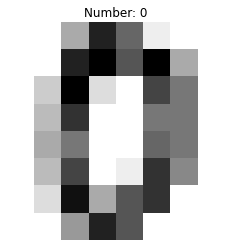

In [7]:
plt.imshow(digits.images[0],cmap='gray_r')
plt.axis('off')
plt.title('Number: ' + str(y[0]))


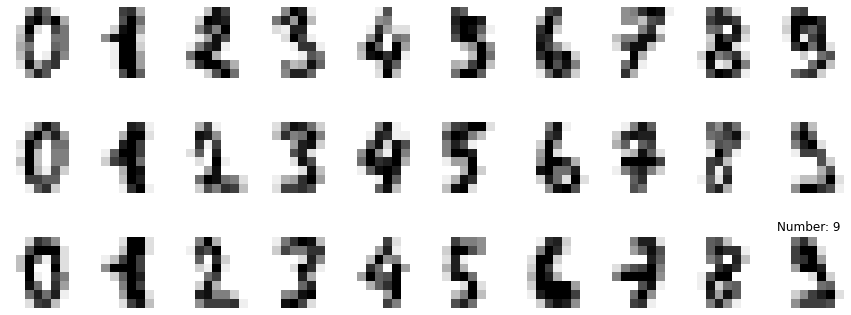

In [9]:
figure,axes = plt.subplots(3,10,figsize=(15,6))
for ax,image,number in zip(axes.ravel(),digits.images,y):
    ax.axis('off')
    ax.imshow(image,cmap='gray_r')
    plt.title('Number: ' + str(number))

 Flattening the numpy Array

In [15]:
image = digits.images[0]
print("Original image data")
print(image)

image_flatten = image.ravel()
print('\nFlattened image')
print(image_flatten)

print('\nFeature data for sample')
print(x[0])

print('\n Feature data for all sample')
print(x)


Original image data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Flattened image
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Feature data for sample
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

 Feature data for all sample
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  

Splitting the dataset into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.35,stratify=y)
#stratify parameter makes the split so that the proportion of the value produced is same as the given proportion y

Fitting the model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Making predictions using the trained model

In [25]:
y_predict = knn.predict(x_test)

y_predict

array([5, 0, 5, 1, 5, 8, 6, 2, 5, 3, 0, 9, 2, 4, 6, 1, 9, 6, 6, 7, 7, 4,
       4, 3, 5, 2, 3, 6, 3, 2, 9, 1, 1, 7, 9, 4, 3, 0, 2, 9, 1, 0, 3, 3,
       6, 5, 5, 7, 9, 4, 1, 5, 0, 0, 1, 6, 0, 4, 4, 3, 1, 3, 9, 4, 8, 5,
       5, 8, 4, 2, 3, 3, 3, 8, 4, 5, 1, 1, 4, 9, 1, 0, 2, 7, 4, 2, 0, 2,
       5, 7, 6, 1, 2, 5, 3, 4, 4, 7, 8, 5, 5, 3, 4, 6, 4, 7, 5, 8, 3, 0,
       6, 4, 3, 0, 0, 5, 5, 8, 6, 7, 8, 0, 0, 9, 8, 7, 9, 2, 8, 4, 8, 2,
       1, 0, 3, 4, 0, 8, 9, 2, 5, 1, 4, 1, 8, 0, 6, 4, 9, 5, 0, 7, 4, 6,
       3, 3, 9, 9, 9, 4, 8, 3, 7, 3, 4, 6, 0, 1, 0, 8, 6, 4, 1, 5, 3, 9,
       6, 0, 5, 3, 0, 3, 0, 7, 6, 8, 7, 6, 2, 9, 5, 1, 9, 7, 1, 9, 5, 3,
       4, 1, 7, 9, 1, 2, 6, 4, 7, 8, 1, 4, 2, 1, 9, 4, 2, 7, 5, 6, 2, 8,
       4, 5, 3, 2, 4, 9, 4, 7, 8, 1, 5, 2, 2, 3, 8, 1, 7, 5, 8, 6, 1, 2,
       1, 6, 0, 7, 7, 7, 1, 0, 1, 6, 2, 1, 1, 0, 9, 5, 9, 4, 5, 4, 8, 7,
       6, 1, 5, 0, 5, 1, 7, 8, 3, 1, 0, 9, 1, 1, 8, 6, 3, 9, 0, 0, 3, 4,
       2, 3, 2, 0, 7, 7, 9, 3, 7, 3, 1, 0, 9, 0, 4,

Evaluating the results by calculating the classification report (performance measure)

In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_predict)
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       0.96      1.00      0.98        64
           2       1.00      1.00      1.00        62
           3       0.97      0.95      0.96        64
           4       1.00      0.98      0.99        63
           5       0.98      1.00      0.99        64
           6       1.00      1.00      1.00        63
           7       0.95      0.98      0.97        63
           8       0.98      0.95      0.97        61
           9       0.98      0.95      0.97        63

    accuracy                           0.98       629
   macro avg       0.98      0.98      0.98       629
weighted avg       0.98      0.98      0.98       629



Evaluating using confusion matrix

In [34]:
from sklearn import metrics

CM = metrics.confusion_matrix(y_test,y_predict)
print(CM)

[[62  0  0  0  0  0  0  0  0  0]
 [ 0 64  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 61  0  1  0  2  0  0]
 [ 0  0  0  0 62  0  0  1  0  0]
 [ 0  0  0  0  0 64  0  0  0  0]
 [ 0  0  0  0  0  0 63  0  0  0]
 [ 0  0  0  0  0  0  0 62  0  1]
 [ 0  2  0  1  0  0  0  0 58  0]
 [ 0  1  0  1  0  0  0  0  1 60]]


Text(0.5, 1.0, 'Heatmap for Confusion matrix in minst dataset')

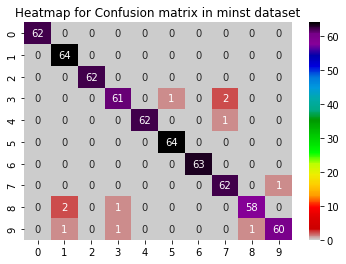

In [33]:
import seaborn as sns
s = sns.heatmap(CM, annot=True, cmap='nipy_spectral_r')
s.set_title('Heatmap for Confusion matrix in minst dataset')

In [35]:
# Calculating the accuracy
acc = metrics.balanced_accuracy_score(y_test,y_predict)
acc

0.982457959276607